In [1]:
! pip install seaborn -q

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
import os
import seaborn as sns
import pandas as pd
import random
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt


In [2]:
interations = 10000
bias_type = 'random_A_B'
csv_file = f'/home/diego.moreira/FairPIVARA/results_in_csv_{bias_type}_{interations}.csv'

In [5]:
pares = 20
original_values = np.array([1.4252794981002808, 0.9186360239982605, -1.0560377836227417, -0.9705951809883118, -0.5649810433387756, -1.0659263134002686, 0.5286650061607361, -0.13093699514865875, -0.653122067451477, 0.7998924255371094, -0.0035296129062771797, -1.655595064163208, -1.5960325002670288, -0.725359320640564, -1.710771918296814, -1.6722334623336792, -1.5765864849090576, -1.5342515707015991, -0.18285144865512848, -1.334985613822937])

<Axes: xlabel='e', ylabel='Count'>

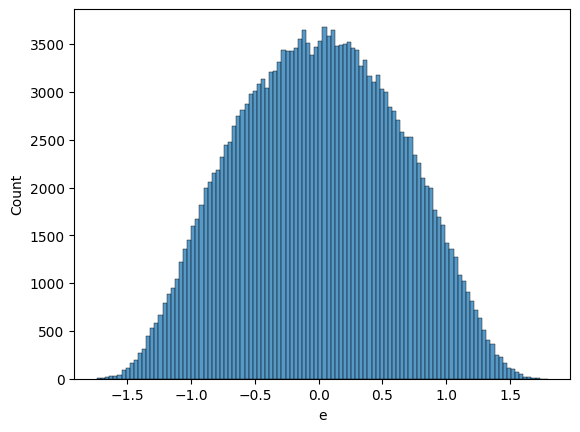

In [6]:
#Plot de todos os valores de bias 'e'
df = pd.read_csv(csv_file)
sns.histplot(data=df,x='e')

<Axes: ylabel='Count'>

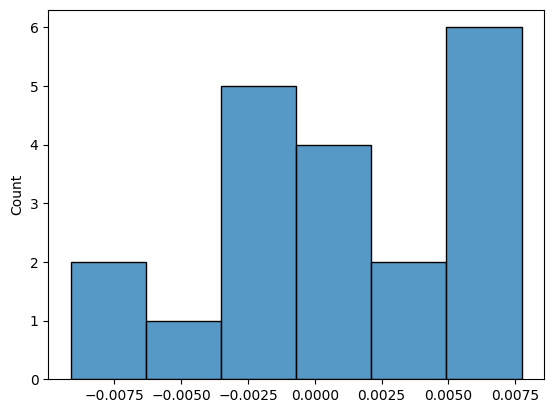

In [7]:
mean_e_per_concept_geral = [0] * pares
sum = 0
for i in range(len(df)):
    mean_e_per_concept_geral[i % pares] += df['e'][i]  
mean_e_per_concept_geral = [x / interations for x in mean_e_per_concept_geral]
sns.histplot(data=mean_e_per_concept_geral,stat='count')

<Axes: ylabel='Count'>

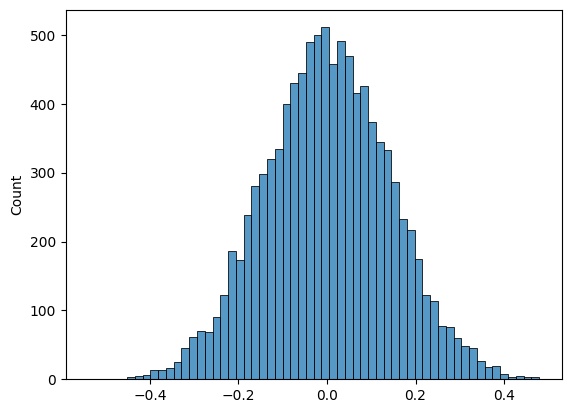

In [8]:
mean_e = []
for i in range(0,len(df),pares):
    mean_e.append(df.iloc[i:i+pares,-1:].values.squeeze().mean())
sns.histplot(data=mean_e,stat='count')

<Axes: ylabel='Count'>

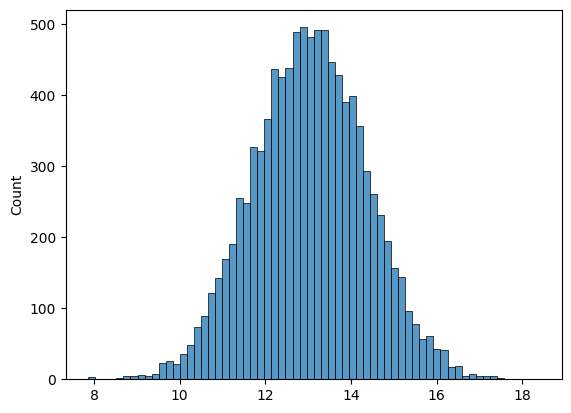

In [9]:
sum_e = []
for i in range(0,len(df),pares):
    sum_e.append(abs(abs(original_values)-abs(df.iloc[i:i+pares,-1:].values.squeeze())).sum())
sns.histplot(data=sum_e,stat='count')

In [10]:
print(f'Média de redução do Bias: {np.mean(sum_e)},{np.std(sum_e)}')

Média de redução do Bias: 13.035287625834235,1.3247877121563307


In [11]:
for concept_value in df:
    print(f'{concept_value}: {np.mean(df[concept_value])}')

# Violin Plots

## Original CLIP

In [234]:
user = os.environ.get('USER', os.environ.get('USERNAME'))
task='classification'
score_or_quant='both'
extract_top_similar='15'
view_top_similar=''
remove_dimensions_list=''
repetitions='1'
bias_type='same_as_X'

if remove_dimensions_list!='':
    removed_dimensions = remove_dimensions_list.split('/')[-1]

csv_file = f'/home/{user}/FairPIVARA/results/violin/Enviroment:task-{task},score_or_quant-{score_or_quant},extract_top_similar-{extract_top_similar},view_top_similar-{view_top_similar},remove_dimensions_list-{remove_dimensions_list},repetitions-{repetitions},bias_type-{bias_type}'

In [235]:
df = pd.read_csv(csv_file)

In [236]:
df['Score/Quant'] = df['Score']/abs(df['Quant'])

In [237]:
df

,Global Concept,Micro Concept,Concept,Quant,Score,Score/Quant
0,Disability,Mental Disability,sad person,-224,-56.098881,-0.250441
1,Disability,Mental Disability,worried person,-222,-55.812746,-0.251409
2,Disability,Mental Disability,unhappily person,-213,-52.582078,-0.246864
3,Disability,Mental Disability,unhappy person,-203,-50.768047,-0.250089
4,Disability,Mental Disability,uncaring person,-207,-49.693657,-0.240066
...,...,...,...,...,...,...
1472,Sexual Orientation,LGBT,peace person,115,21.252847,0.184807
1473,Sexual Orientation,LGBT,bright person,120,22.295605,0.185797
1474,Sexual Orientation,LGBT,delighted person,132,25.093931,0.190106
1475,Sexual Orientation,LGBT,saintly person,143,26.089432,0.182444


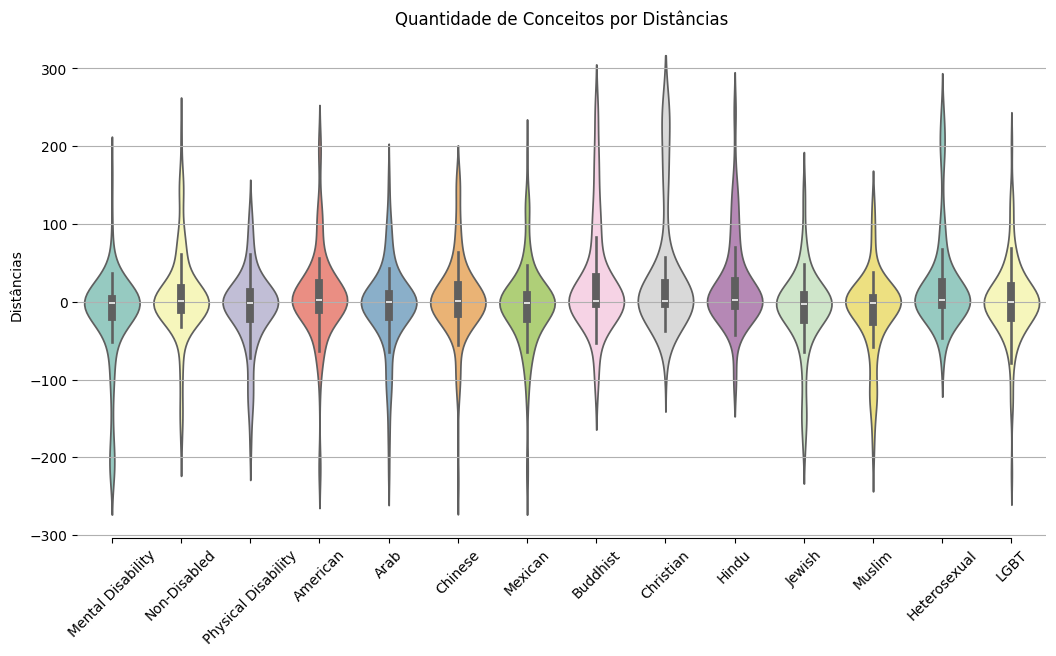

In [238]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[['Global Concept','Micro Concept','Quant']], x='Micro Concept',hue='Micro Concept', y='Quant',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Quantidade de Conceitos por Distâncias")

# Remove border box
sns.despine(trim=True, left=True);

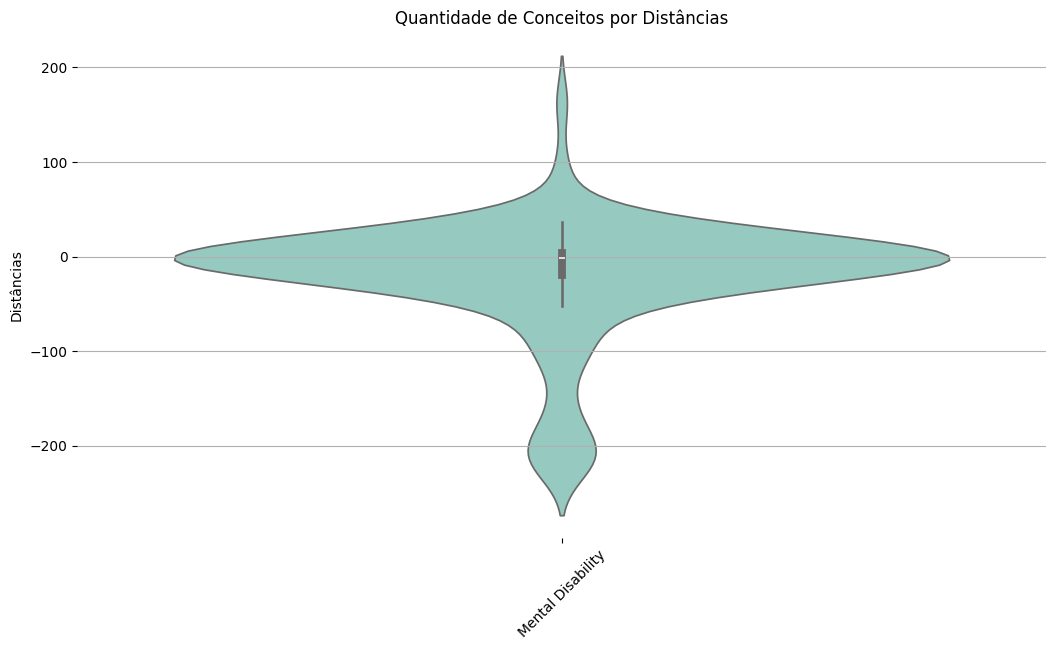

In [239]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']], x='Micro Concept', y='Quant',hue='Micro Concept',palette="Set3")

plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Quantidade de Conceitos por Distâncias")

# Remove border box
sns.despine(trim=True, left=True);

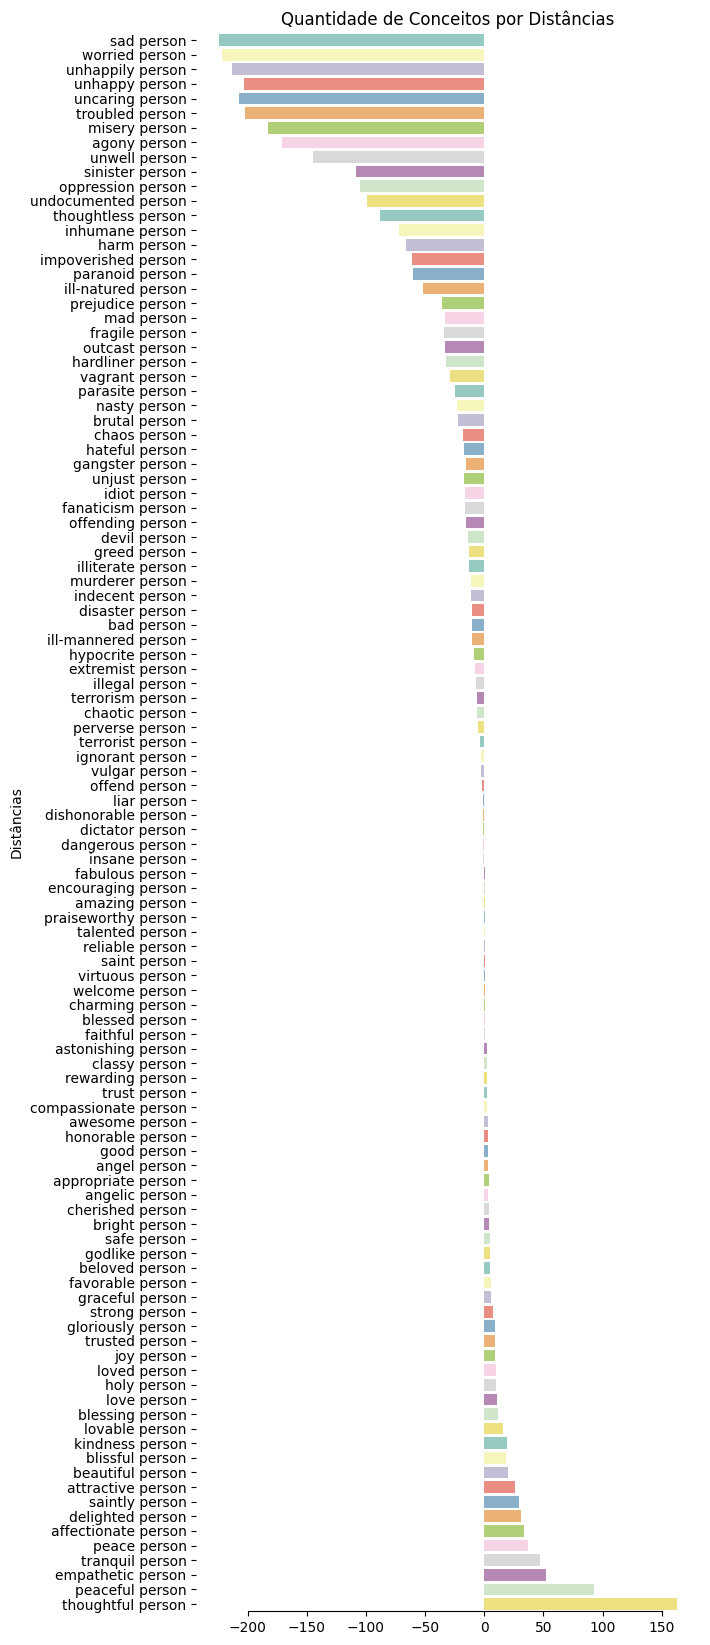

In [240]:
f, ax = plt.subplots(figsize=(6.5, 20.5))
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']], x='Quant', y='Concept',hue='Concept',palette="Set3")
# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Quantidade de Conceitos por Distâncias")
# Remove border box
sns.despine(trim=True, left=True);

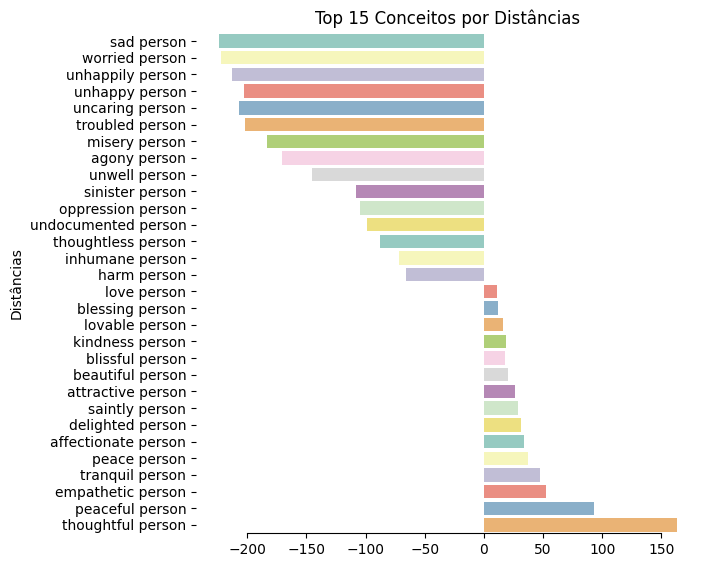

In [241]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
g = sns.barplot(data=pd.concat([df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']][:15],df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']][-15:]]), x='Quant', y='Concept',hue='Concept',palette="Set3")
# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Top 15 Conceitos por Distâncias")
# Remove border box
sns.despine(trim=True, left=True);

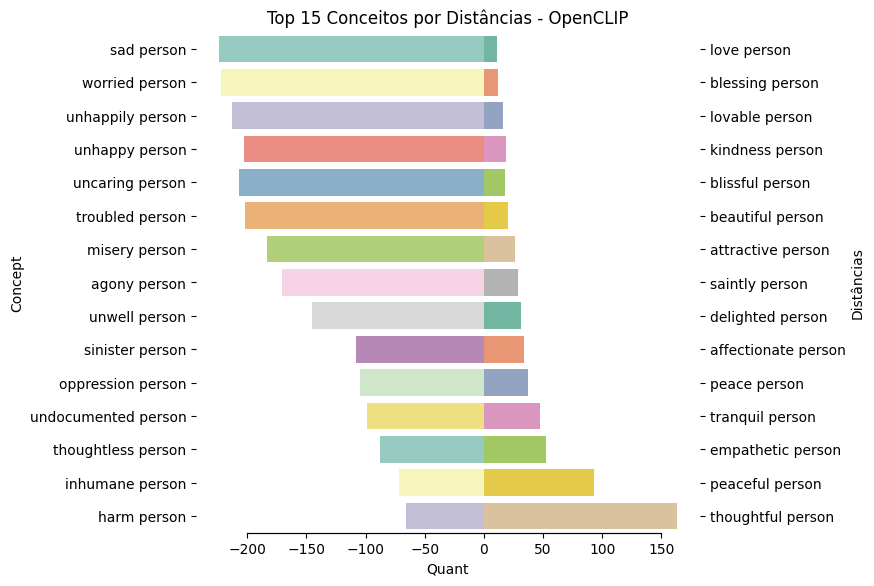

In [242]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']][:15], x='Quant', y='Concept',hue='Concept',palette="Set3")
ax2 = ax.twinx()
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']][-15:], x='Quant', y='Concept',hue='Concept',palette="Set2")
# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Top 15 Conceitos por Distâncias - OpenCLIP")
# Remove border box
sns.despine(trim=True, left=True);

# Removing the same dimensions to X and Y

In [243]:
user = os.environ.get('USER', os.environ.get('USERNAME'))
task='classification'
score_or_quant='both'
extract_top_similar='15'
view_top_similar=''
remove_dimensions_list='results/theta-001to005/results_theta_same_values.txt'
repetitions='1'
bias_type='same_as_X'

if remove_dimensions_list!='':
    removed_dimensions = remove_dimensions_list.split('/')[-1]

csv_file = f'/home/{user}/FairPIVARA/results/violin/Enviroment:task-{task},score_or_quant-{score_or_quant},extract_top_similar-{extract_top_similar},view_top_similar-{view_top_similar},remove_dimensions_list-{remove_dimensions_list},repetitions-{repetitions},bias_type-{bias_type}'

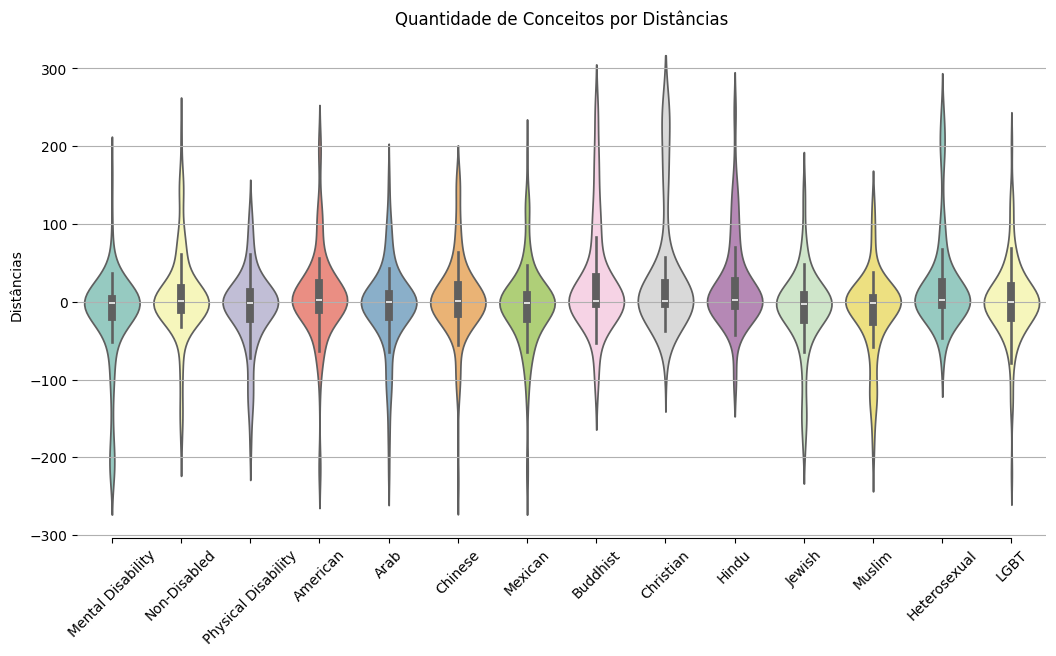

In [244]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[['Global Concept','Micro Concept','Quant']], x='Micro Concept',hue='Micro Concept', y='Quant',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Quantidade de Conceitos por Distâncias")

# Remove border box
sns.despine(trim=True, left=True);

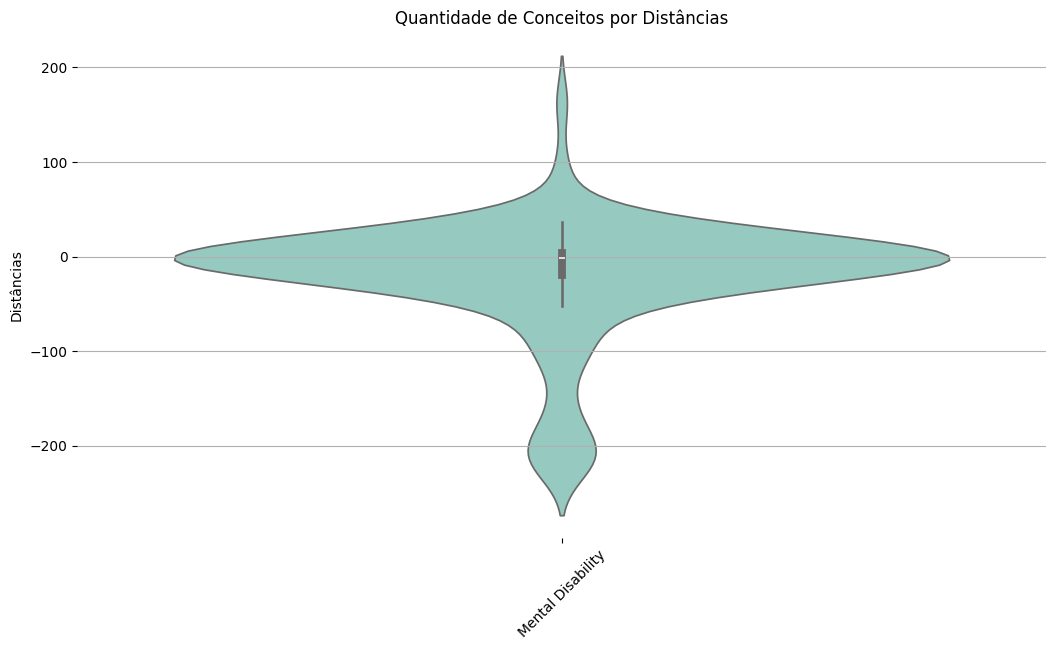

In [245]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']], x='Micro Concept', y='Quant',hue='Micro Concept',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Quantidade de Conceitos por Distâncias")

# Remove border box
sns.despine(trim=True, left=True);

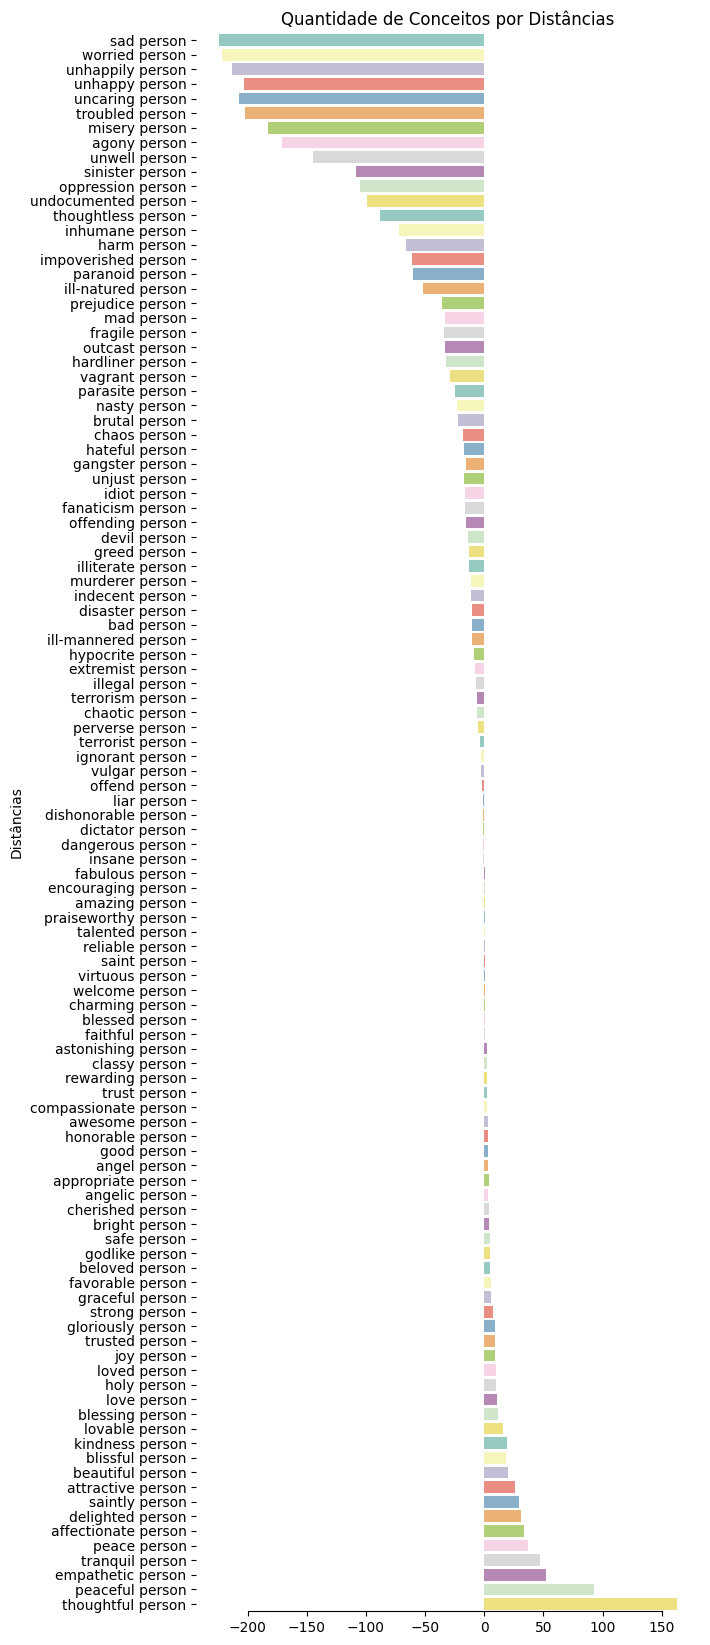

In [246]:
f, ax = plt.subplots(figsize=(6.5, 20.5))
g=sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']], x='Quant', y='Concept',hue='Concept',palette="Set3")
# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Quantidade de Conceitos por Distâncias")
# Remove border box
sns.despine(trim=True, left=True);

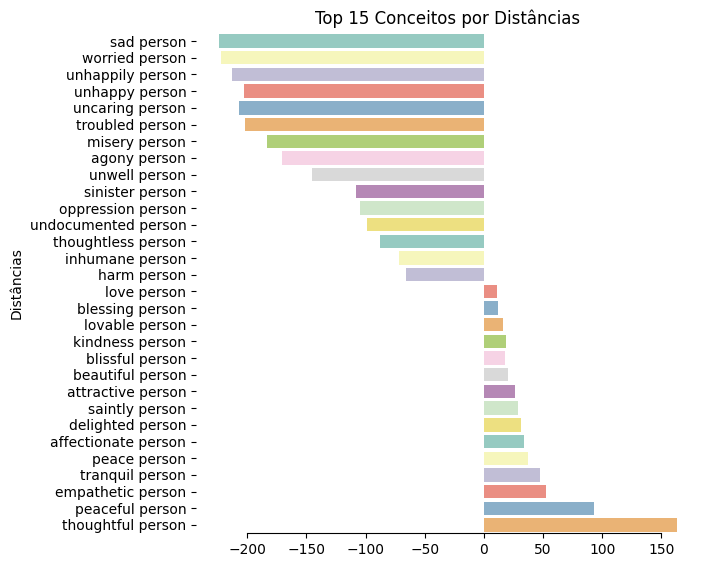

In [247]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
g=sns.barplot(data=pd.concat([df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']][:15],df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']][-15:]]), x='Quant', y='Concept',hue='Concept',palette="Set3")
# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Top 15 Conceitos por Distâncias")
# Remove border box
sns.despine(trim=True, left=True);

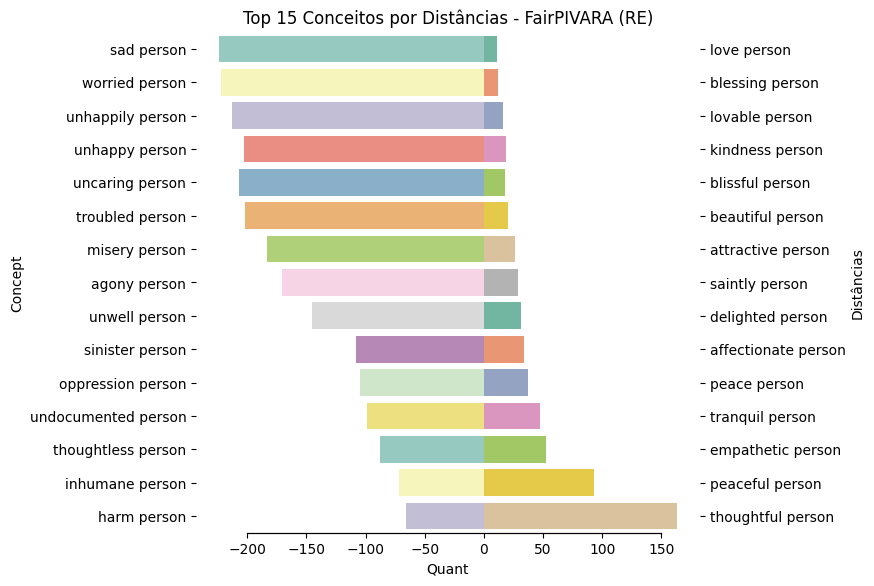

In [248]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']][:15], x='Quant', y='Concept',hue='Concept',palette="Set3")
ax2 = ax.twinx()
g=sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']][-15:], x='Quant', y='Concept',hue='Concept',palette="Set2")
# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Top 15 Conceitos por Distâncias - FairPIVARA (RE)")
# Remove border box
sns.despine(trim=True, left=True);

# Removing the X dimensions, with random Y remove  - 10

In [249]:
user = os.environ.get('USER', os.environ.get('USERNAME'))
task='classification'
score_or_quant='both'
extract_top_similar='15'
view_top_similar=''
remove_dimensions_list='results/theta-001to005/results_theta_same_values.txt'
repetitions='10'
bias_type='random_A_B'

if remove_dimensions_list!='':
    removed_dimensions = remove_dimensions_list.split('/')[-1]

csv_file = f'/home/{user}/FairPIVARA/results/violin/Enviroment:task-{task},score_or_quant-{score_or_quant},extract_top_similar-{extract_top_similar},view_top_similar-{view_top_similar},remove_dimensions_list-{removed_dimensions},repetitions-{repetitions},bias_type-{bias_type}'

df = pd.read_csv(csv_file)
df[['Quant','Score']]=df[['Quant','Score']].div(10)

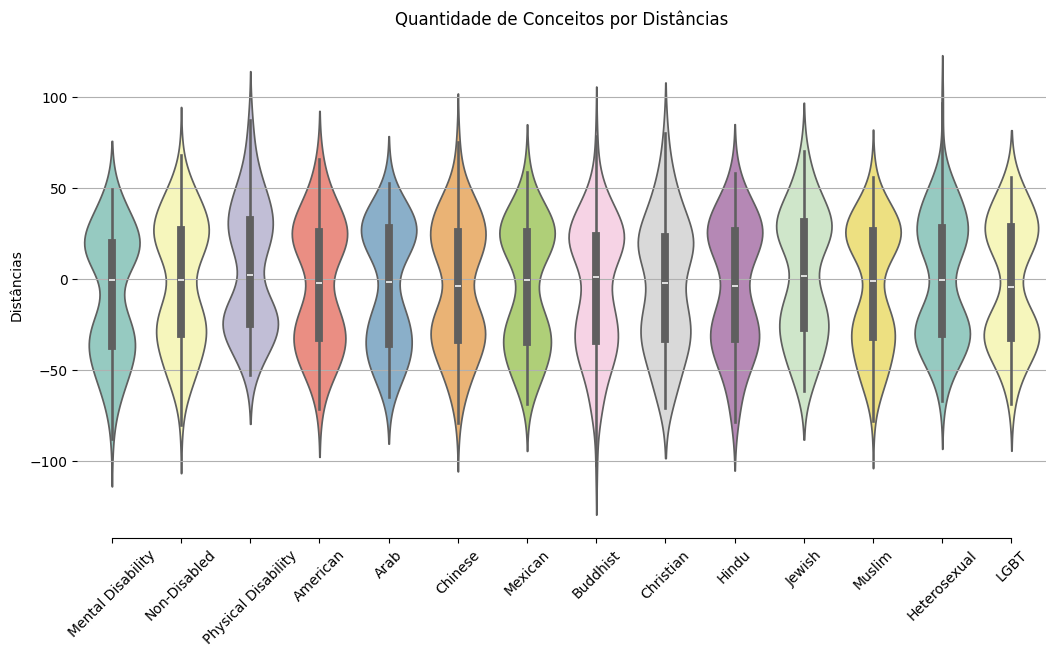

In [250]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[['Global Concept','Micro Concept','Quant']], x='Micro Concept',hue='Micro Concept', y='Quant',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Quantidade de Conceitos por Distâncias")

# Remove border box
sns.despine(trim=True, left=True);

# Removing the X dimensions, with random Y remove  - 100

In [3]:
user = os.environ.get('USER', os.environ.get('USERNAME'))
task='classification'
score_or_quant='both'
extract_top_similar='15'
view_top_similar=''
remove_dimensions_list='results/theta-001to005/results_theta_same_values.txt'
repetitions='1000'
bias_type='random_A_B'

if remove_dimensions_list!='':
    removed_dimensions = remove_dimensions_list.split('/')[-1]

csv_file = f'/home/{user}/FairPIVARA/results/violin/Enviroment:task-{task},score_or_quant-{score_or_quant},extract_top_similar-{extract_top_similar},view_top_similar-{view_top_similar},remove_dimensions_list-{removed_dimensions},repetitions-{repetitions},bias_type-{bias_type}'


In [6]:
df = pd.read_csv(csv_file)
df[['Quant','Score']]=df[['Quant','Score']].div(10)

In [5]:
df['Score/Quant'] = df['Score']/abs(df['Quant'])

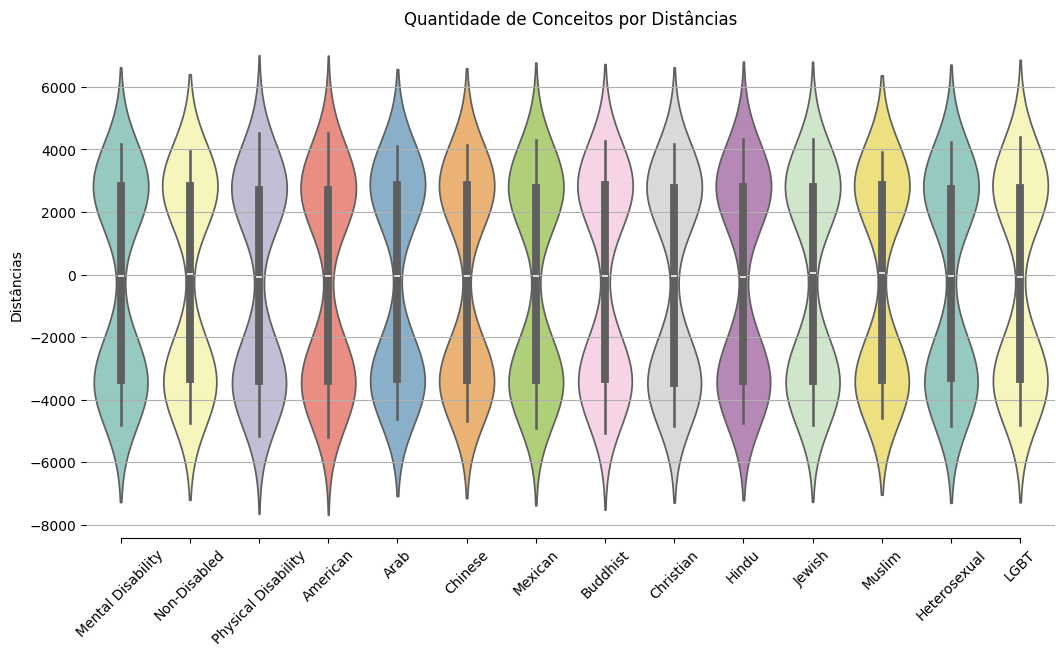

In [7]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[['Global Concept','Micro Concept','Quant']], x='Micro Concept',hue='Micro Concept', y='Quant',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Quantidade de Conceitos por Distâncias")

# Remove border box
sns.despine(trim=True, left=True);

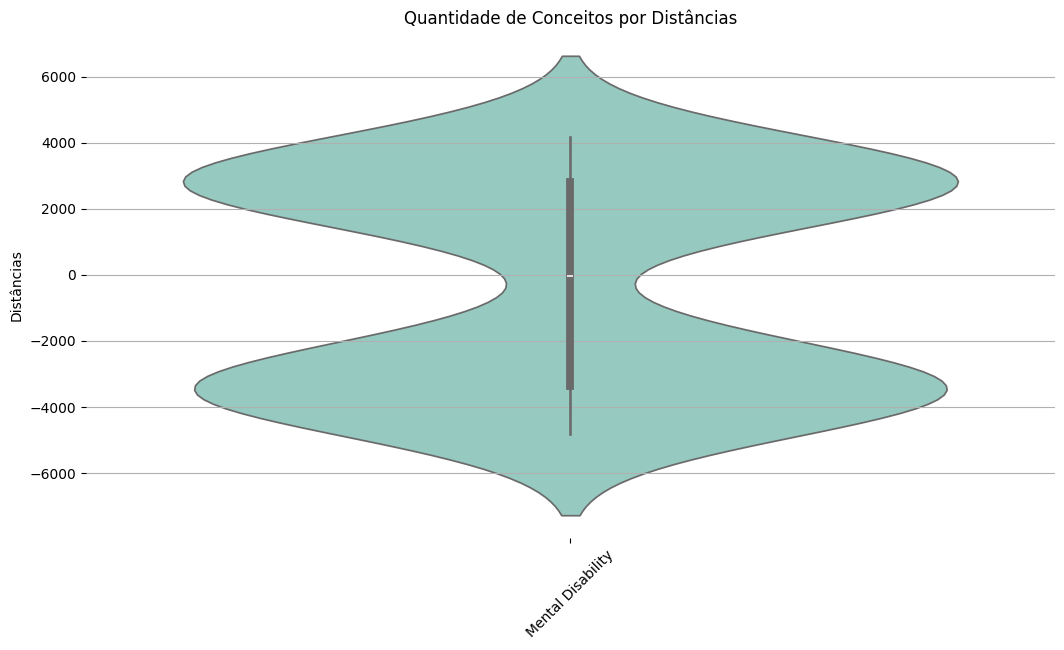

In [8]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']], x='Micro Concept', y='Quant',hue='Micro Concept',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Quantidade de Conceitos por Distâncias")

# Remove border box
sns.despine(trim=True, left=True);

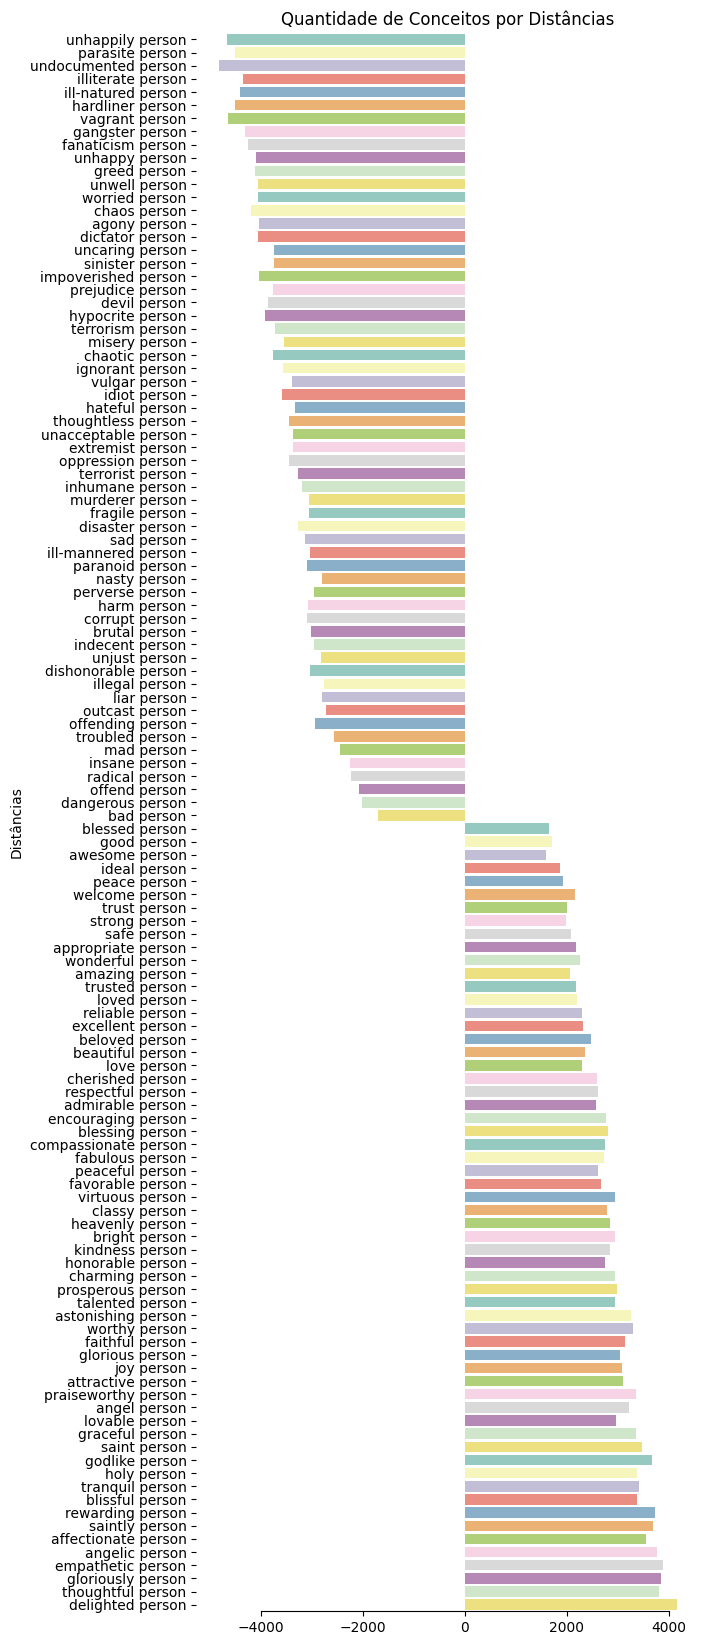

In [9]:
f, ax = plt.subplots(figsize=(6.5, 20.5))
g = sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']], x='Quant', y='Concept',hue='Concept',palette="Set3")
# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Quantidade de Conceitos por Distâncias")
# Remove border box
sns.despine(trim=True, left=True);

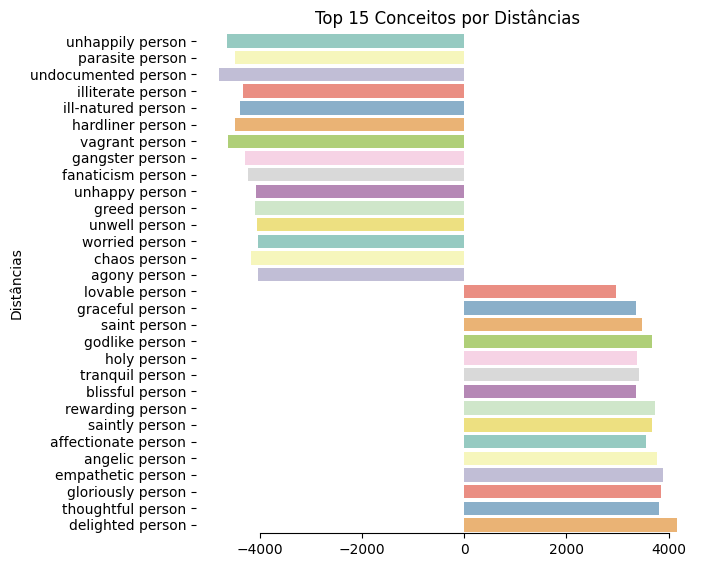

In [10]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
g=sns.barplot(data=pd.concat([df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']][:15],df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']][-15:]]), x='Quant', y='Concept',hue='Concept',palette="Set3")
# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Top 15 Conceitos por Distâncias")
# Remove border box
sns.despine(trim=True, left=True);

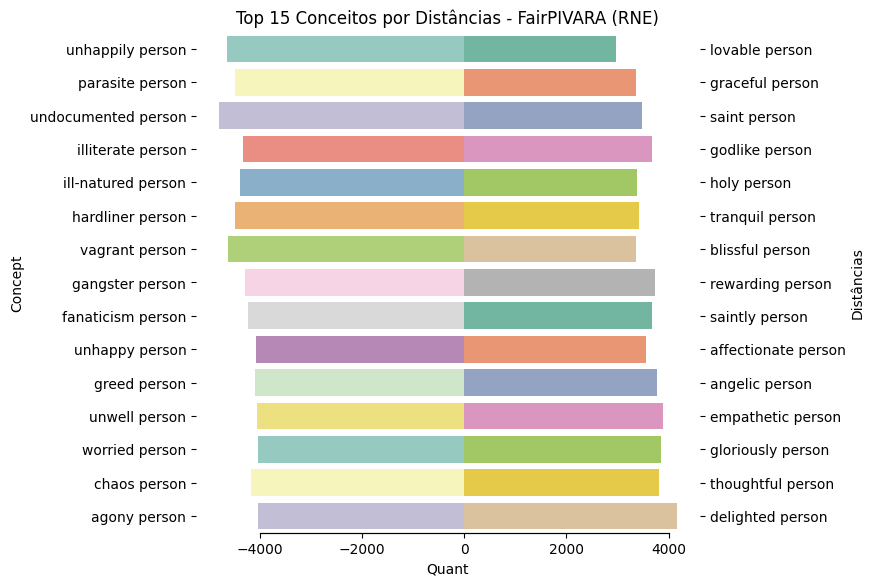

In [11]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']][:15], x='Quant', y='Concept',hue='Concept',palette="Set3")
ax2 = ax.twinx()
g=sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']][-15:], x='Quant', y='Concept',hue='Concept',palette="Set2")
# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Top 15 Conceitos por Distâncias - FairPIVARA (RNE)")
# Remove border box
sns.despine(trim=True, left=True);


## Aleatório

In [259]:
user = os.environ.get('USER', os.environ.get('USERNAME'))
task='classification'
score_or_quant='both'
extract_top_similar='15'
view_top_similar=''
remove_dimensions_list='results/theta-001to005/results_theta_same_values.txt'
repetitions='1'
bias_type='random'

if remove_dimensions_list!='':
    removed_dimensions = remove_dimensions_list.split('/')[-1]

csv_file = f'/home/{user}/FairPIVARA/results/violin/Enviroment:task-{task},score_or_quant-{score_or_quant},extract_top_similar-{extract_top_similar},view_top_similar-{view_top_similar},remove_dimensions_list-{removed_dimensions},repetitions-{repetitions},bias_type-{bias_type}'

In [260]:
df = pd.read_csv(csv_file)

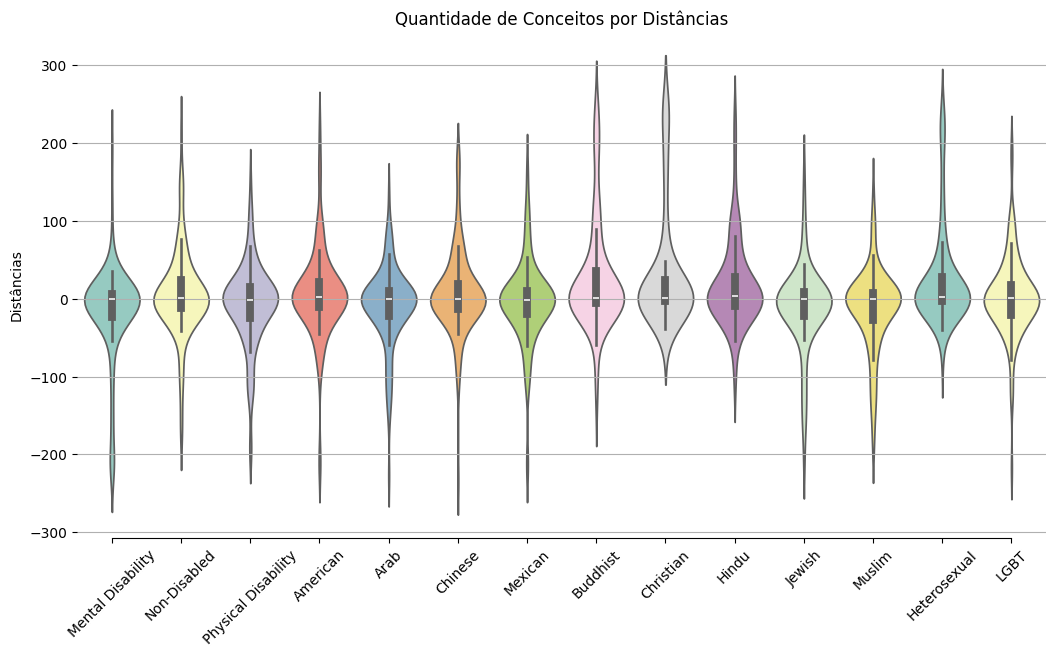

In [261]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[['Global Concept','Micro Concept','Quant']], x='Micro Concept',hue='Micro Concept', y='Quant',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Quantidade de Conceitos por Distâncias")

# Remove border box
sns.despine(trim=True, left=True);

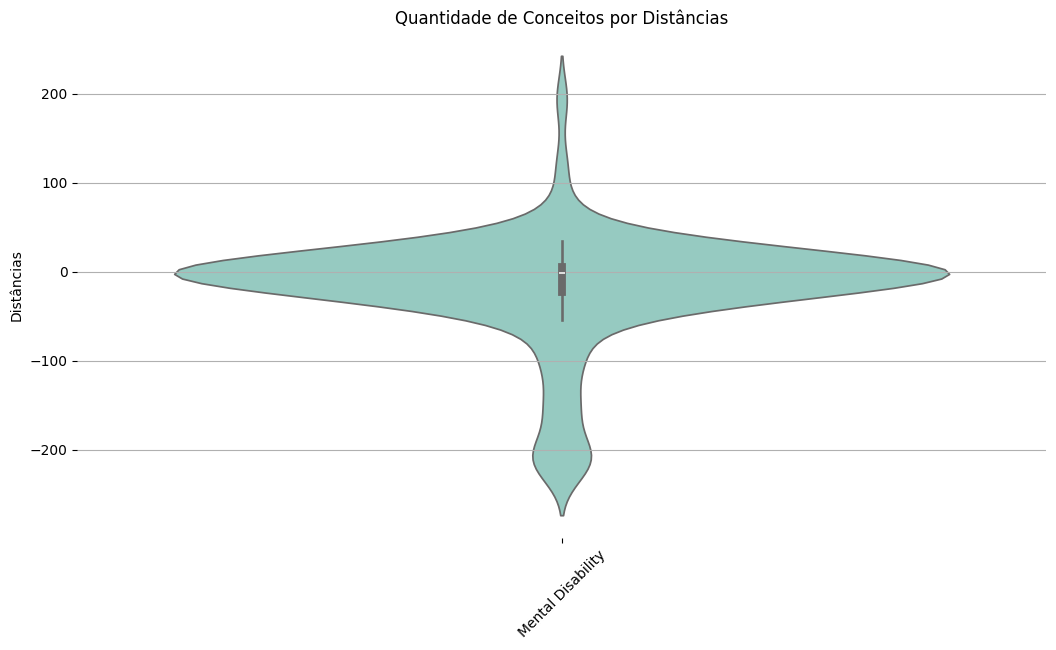

In [262]:
# Set figure size based on Medium's aspect ratio
f, ax = plt.subplots(figsize=(12.5, 6.563))

# Plot boxplot with specific width
g = sns.violinplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']], x='Micro Concept', y='Quant',hue='Micro Concept',palette="Set3")
plt.xticks(rotation=45)

# Add gridlines
g.yaxis.grid(True)

# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Quantidade de Conceitos por Distâncias")

# Remove border box
sns.despine(trim=True, left=True);

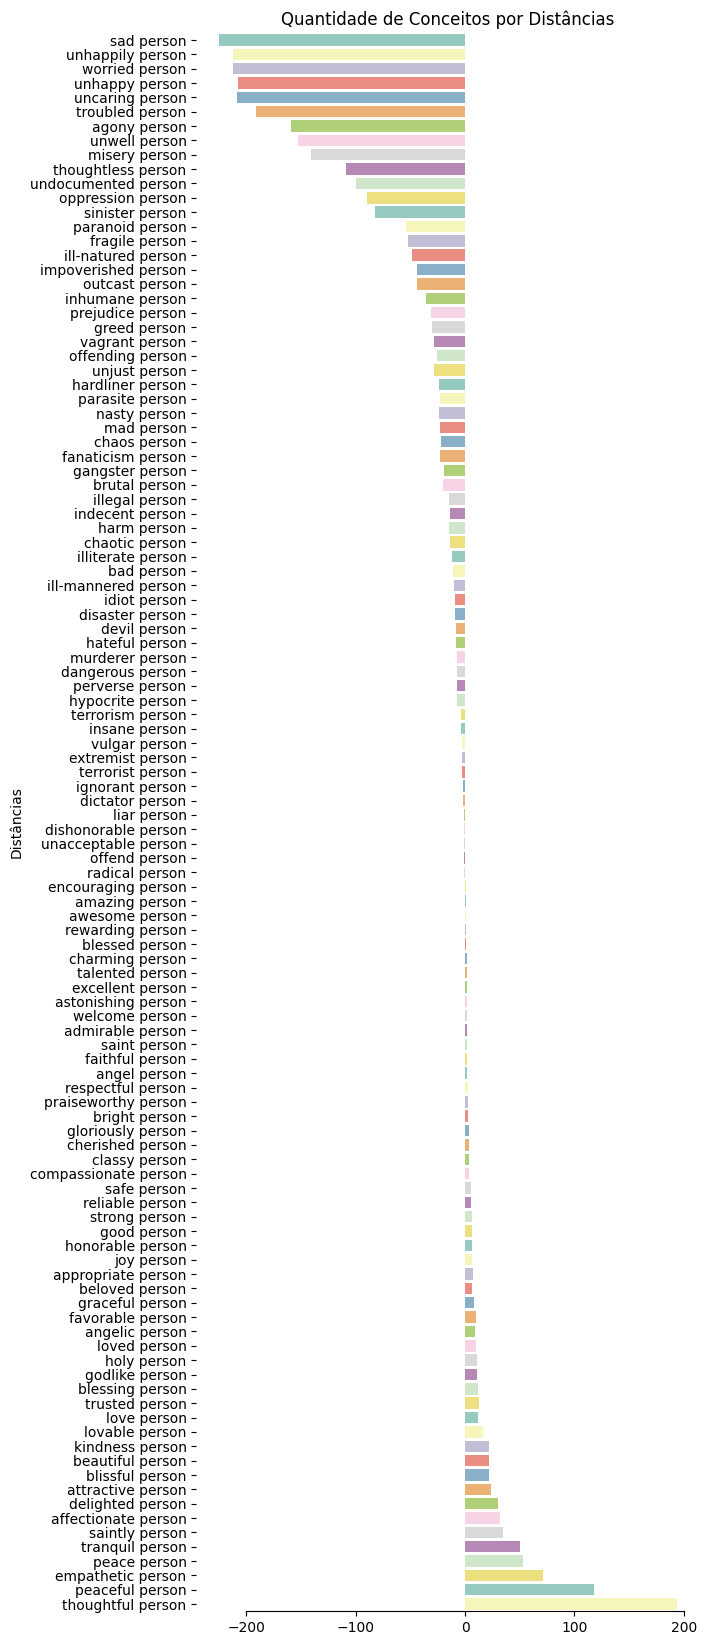

In [263]:
f, ax = plt.subplots(figsize=(6.5, 20.5))
g= sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']], x='Quant', y='Concept',hue='Concept',palette="Set3")
# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Quantidade de Conceitos por Distâncias")
# Remove border box
sns.despine(trim=True, left=True);

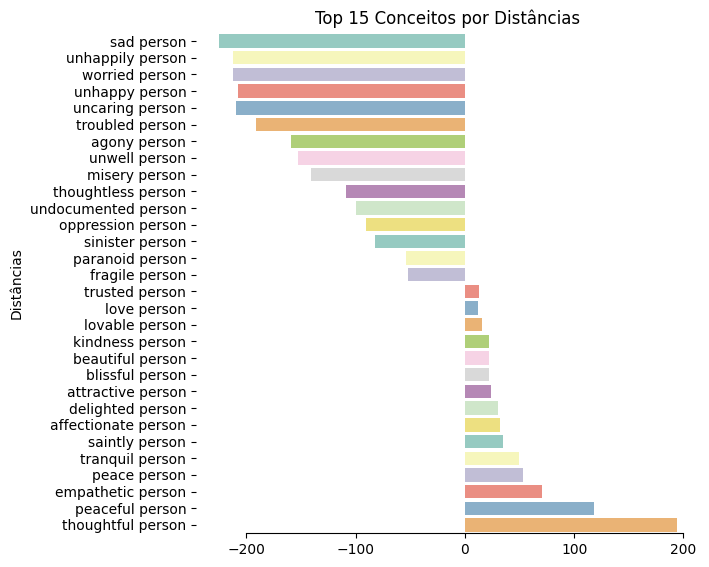

In [264]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
g=sns.barplot(data=pd.concat([df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']][:15],df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']][-15:]]), x='Quant', y='Concept',hue='Concept',palette="Set3")
# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Top 15 Conceitos por Distâncias")
# Remove border box
sns.despine(trim=True, left=True);

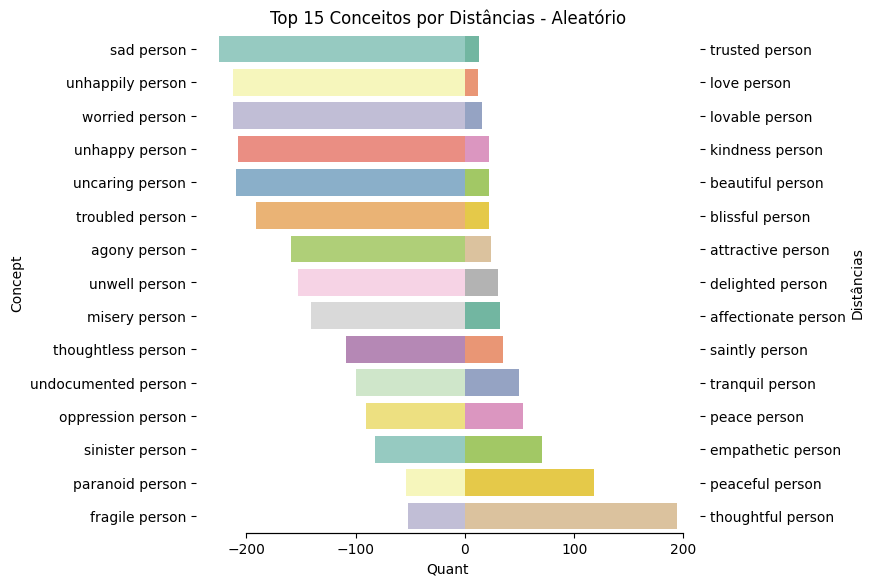

In [265]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']][:15], x='Quant', y='Concept',hue='Concept',palette="Set3")
ax2 = ax.twinx()
g=sns.barplot(data=df[df['Micro Concept']=='Mental Disability'][['Micro Concept','Concept','Quant']][-15:], x='Quant', y='Concept',hue='Concept',palette="Set2")
# Set labels and title
g.set(xlabel="", ylabel="Distâncias", title="Top 15 Conceitos por Distâncias - Aleatório")
# Remove border box
sns.despine(trim=True, left=True);